In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

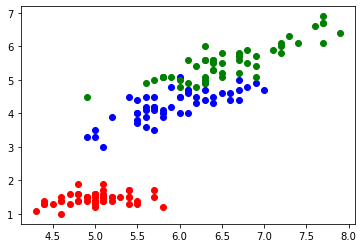

In [5]:
plt.scatter(setosa.SepalLengthCm, setosa.PetalLengthCm , c= 'r')
plt.scatter(versicolor.SepalLengthCm, versicolor.PetalLengthCm , c= 'b')
plt.scatter(virginica.SepalLengthCm, virginica.PetalLengthCm , c= 'g');

In [6]:
df=df.drop(['Id','Species','SepalWidthCm','PetalWidthCm'], axis=1)
df.head()

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


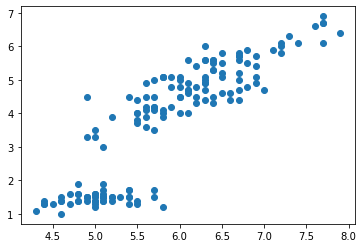

In [7]:
plt.scatter(df.SepalLengthCm, df.PetalLengthCm );

In [8]:
#array of data points
points = np.array(df)
points

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [9]:
points.shape

(150, 2)

In [10]:
def initialize_centroids(points,k):
    centroids = []
    for i in range(k):
        rand_index = np.random.randint(0,len(points))
        centroids.append(points[rand_index])
    return centroids

In [11]:
centroids = initialize_centroids(points,3)
centroids=np.array(centroids)

In [12]:
centroids

array([[4.8, 1.6],
       [6.1, 5.6],
       [5. , 1.5]])

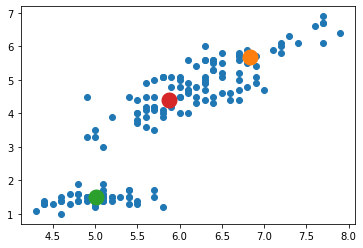

In [48]:
plt.scatter(df.SepalLengthCm , df.PetalLengthCm)
for i in range(3):
    plt.scatter(*centroids[i],linewidth=10)

In [14]:
def Distance2Point(points, centroids):
    distance = sum((points - centroids)**2)**0.5
    return distance

In [15]:
#centroids[i].reshape(2,-1).shape

(2, 1)

In [16]:
def k_means(points,k):
    
    difference = 1
    
    cluster = np.zeros(points.shape[0])
    
    centroids = initialize_centroids(points,k)
    
    while difference:
        for i, row in enumerate(points):
            mini_distance = float('inf')
            for idx,centroid in enumerate(centroids):
                dist = Distance2Point(centroid,row)
                if mini_distance > dist:
                    mini_distance = dist
                    cluster[i] = idx
                    
        new_centriods = pd.DataFrame(points).groupby(by = cluster).mean().values
        
        if np.count_nonzero(centroids-new_centriods) == 0:
            difference = 0
        else:
            centroids = new_centriods
    
    return centroids,cluster     

In [17]:
k_means(points,3)

(array([[5.87413793, 4.39310345],
        [5.00784314, 1.49411765],
        [6.83902439, 5.67804878]]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
        0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 2., 0.,
        2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 2.,
        0., 2., 0., 2., 0., 2., 2., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 0., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2., 0.]))

In [18]:
def calculate_distortion(points, centroids , cluster):
    sum = 0
    for i , val in enumerate(points):
        sum += (centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2
    return sum
    

In [19]:
k=3
centroids, cluster = k_means(points, k)
cost = calculate_distortion(points ,centroids, cluster)

In [32]:
cost_list = []
for k in range(1, 7):
    centroids, cluster = k_means(points, k)
    cost = calculate_distortion(points ,centroids, cluster)
    cost_list.append(cost)

In [33]:
import seaborn as sns

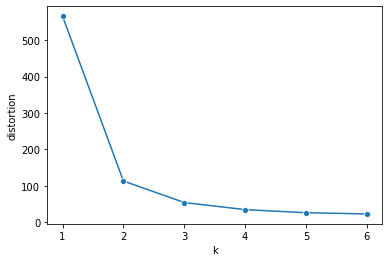

In [35]:
sns.lineplot(x=range(1,7), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('distortion')
plt.show()

In [46]:
k = 3
centroids, clusterr = k_means(points, k)

C:\Users\a\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\a\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


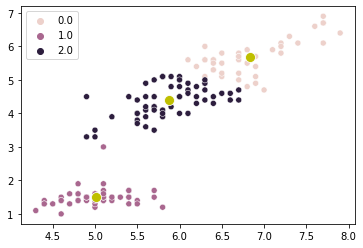

In [47]:
sns.scatterplot(points[:,0], points[:, 1], hue=clusterr)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.show()
